# ChatGPT User Reviews: EDA

**Problem Statement**: To enhance the customer experience for (online) products, this project will analyze user reviews on ChatGPT from the iOS store. By leveraging NLP techniques, I aim to classify overall sentiment, extract product-related feedback and identify trends in user satisfaction. Insights from this analysis will inform actionable recommendations to improve a product’s usability, functionality and overall satisfaction.

**Background:** In this section, I hope to use EDA to be able to better understand the distribution of the data. Some questions I would like to be able to answer are what are the most popular features? Is the app being rated positively or negatively overall? Do users' like certain features or do they dislike certain features? By visualizing the data, I hope to better understand the reviews and how they are being distributed. I am hoping that these insights will help businesses to see where users have the most positive feedback and where they feel the product is lacking the most.  

**Sources:**
> https://git.generalassemb.ly/dsb-826/6.06-lesson-intro-to-spacy

> https://stackoverflow.com/questions/37253326/how-to-find-the-most-common-words-using-spacy

> Note: All function docstrings are written with the help of ChatGPT

### Imports



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

### Read in Data

In [ ]:
file_path = "chatgpt_cleaned.csv"
df = pd.read_csv(file_path)

### Distributions

In [ ]:
# Extract noun phrases (features)
def extract_features(text):
    doc = nlp(text)
    return [chunk.text.lower() for chunk in doc.noun_chunks]

In [ ]:
# Put together the most common features
df['processed_reviews'] = df['processed_reviews'].fillna('').astype(str)
df['features'] = df['processed_reviews'].apply(extract_features)
all_features = [feature for features in df['features'] for feature in features]
feature_counts = Counter(all_features).most_common(20)

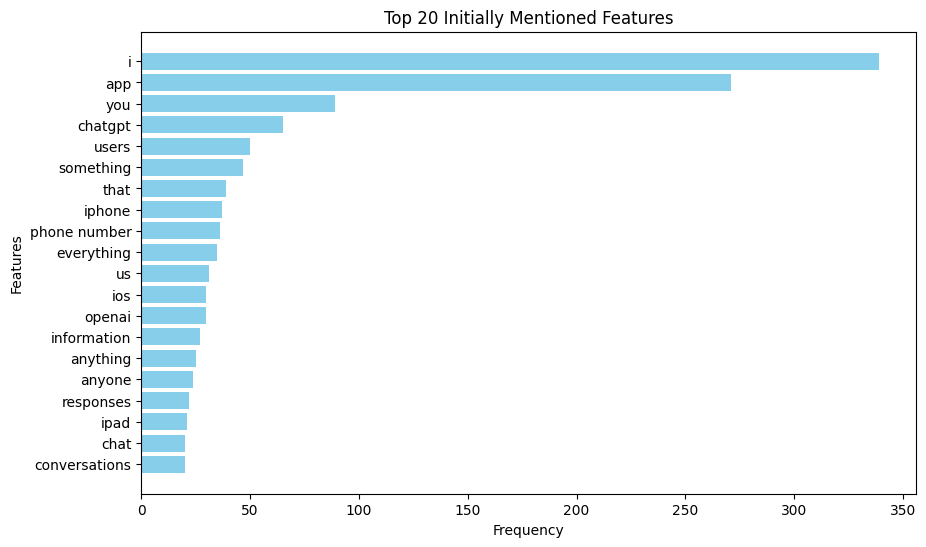

In [ ]:
# Graph the top 20 features mentioned
features, counts = zip(*feature_counts)
plt.figure(figsize=(10, 6))
plt.barh(features, counts, color='skyblue')
plt.title('Top 20 Initially Mentioned Features')
plt.xlabel('Frequency')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

While looking at the graph, it's obvious that we are not able to extract too many meaningful features. Words like "i" and "you" do not contribute to an accurate description of features being mentioned. To combat this, I refined the "extract_features" function and added an "if" statement that is able to remove stop words, single character words like "i" and short phrases.

In [ ]:
def extract_features(text):
  """
    Extract noun phrases from reviews.

    This function processes the input using SpaCy's NLP pipeline to identify and extract noun phrases (chunks).
    It filters out phrases that are:
    - Single-word or single-character phrases
    - Short or whitespace-only phrases

    Parameters:
    -----------
    text : str
        The input text (user reviews) where noun phrases are extracted.

    Returns:
    --------
    str
        A list of meaningful noun phrases (lowercased) extracted from the input text.
        Each noun phrase contains two or more words.
  """
  doc = nlp(text)
  features = []
  for chunk in doc.noun_chunks:
      chunk_text = chunk.text.lower()
      # If statement to exclude stop words, single characters, and short phrases
      if len(chunk_text.split()) > 1 and not chunk_text.isspace():
          features.append(chunk_text)
  return features

In [ ]:
# Put together the most common features
df['processed_reviews'] = df['processed_reviews'].fillna('').astype(str)
df['features'] = df['processed_reviews'].apply(extract_features)
all_features = [feature for features in df['features'] for feature in features]
feature_counts = Counter(all_features).most_common(20)

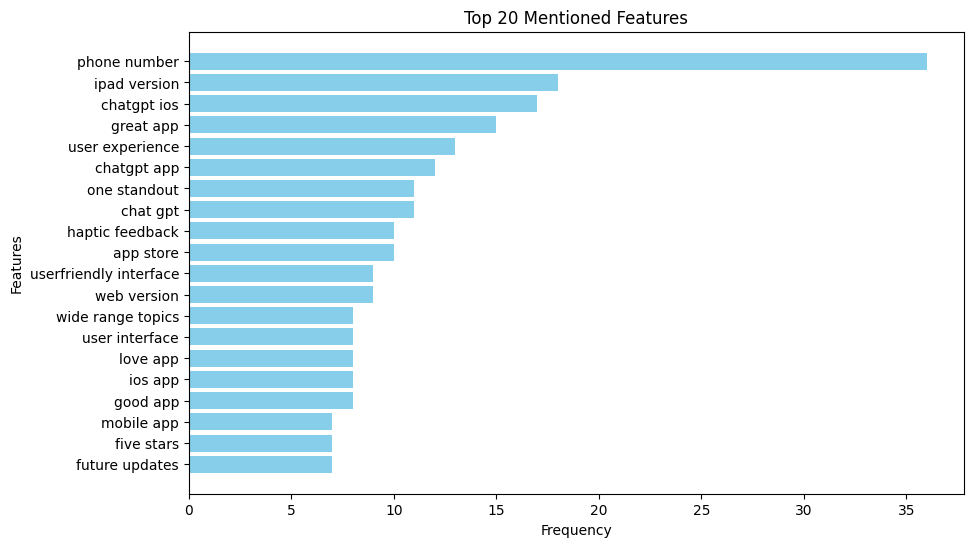

In [ ]:
# Graph the top 20 features mentioned
features, counts = zip(*feature_counts)
plt.figure(figsize=(10, 6))
plt.barh(features, counts, color='skyblue')
plt.title('Top 20 Mentioned Features')
plt.xlabel('Frequency')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df.head()

,date,title,review,rating,processed_reviews,features
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,point ive mostly using chatgpt windows desktop...,"[chatgpt windows desktop, google chrome doable..."
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,ive user since initial roll waiting mobile app...,"[initial roll, mobile application, web app ref..."
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,app would almost perfect wasnt one little thin...,"[one little thing search function anyone, spec..."
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,recently downloaded app overall great platform...,[recently downloaded app overall great platfor...
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,appreciate devs implementing siri supportit al...,"[siri supportit, usefulness app, make query on..."


### Save the data frame as a .csv file

In [ ]:
df.to_csv('chatgpt_cleaned_features.csv', index=False)